In [ ]:
## Gerekli Kütüphaneleri Import Etmek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
import plotly.express as px
import shap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## examine dataset

data = pd.read_csv('Admission_Predict.csv')
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())
print(data.shape)


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312   

In [ ]:
## Checking missing values

print(data.isna().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
## Tekrarlı Veri Kontrolü

print(data.duplicated().sum())

0


In [ ]:
if any(col in data.columns for col in ['LOR', 'SOP']):
    try:
        data['Interview Score'] = (data['SOP'] + data['LOR']) / 2
        print("Interview Score değişkeni eklendi.")
    except KeyError as e:
        print("Gerekli kolon(lar) bulunamadı:", e)
else:
    print("'LOR' veya 'SOP' kolonları veri setinde bulunamadı.")


Interview Score değişkeni eklendi.


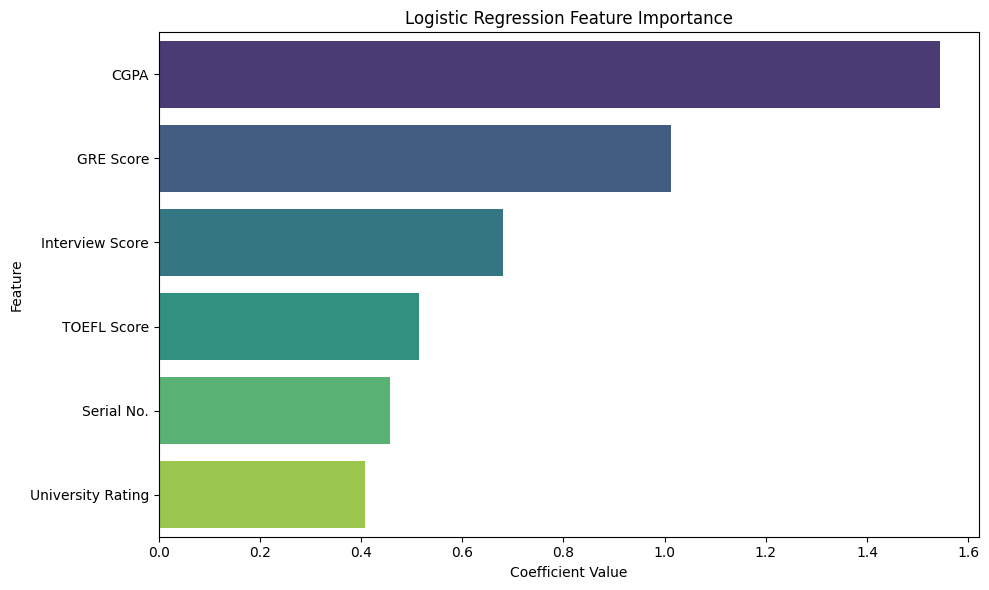

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,CGPA,Interview Score,Chance_of_Admit_Binary,Cluster
0,1,337,118,4,9.65,4.50,1,1
1,2,324,107,4,8.87,4.25,1,0
2,3,316,104,3,8.00,3.25,0,0
3,4,322,110,3,8.67,3.00,1,0
4,5,314,103,2,8.21,2.50,0,0


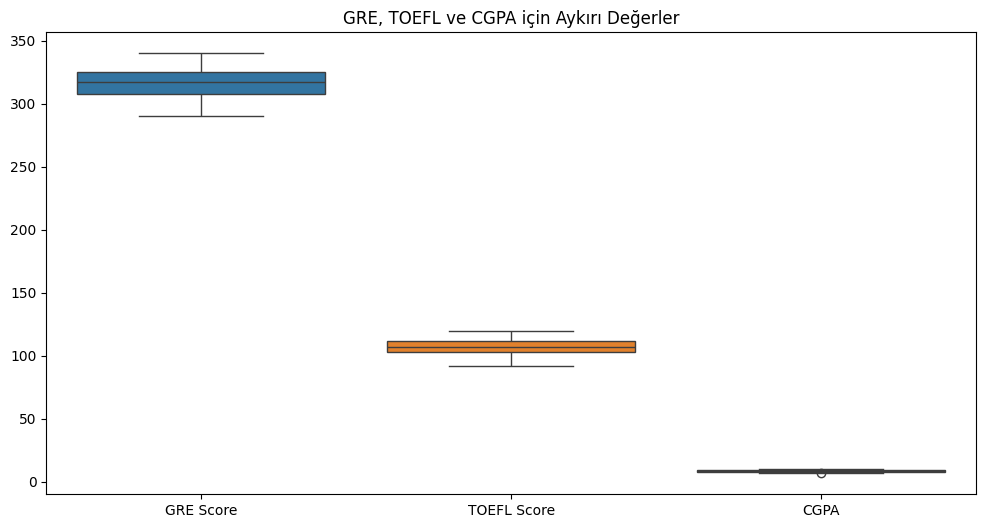

In [ ]:
## Aykırı Değer Görselleştirmesi

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['GRE Score', 'TOEFL Score', 'CGPA']])
plt.title("GRE, TOEFL ve CGPA için Aykırı Değerler")
plt.show()

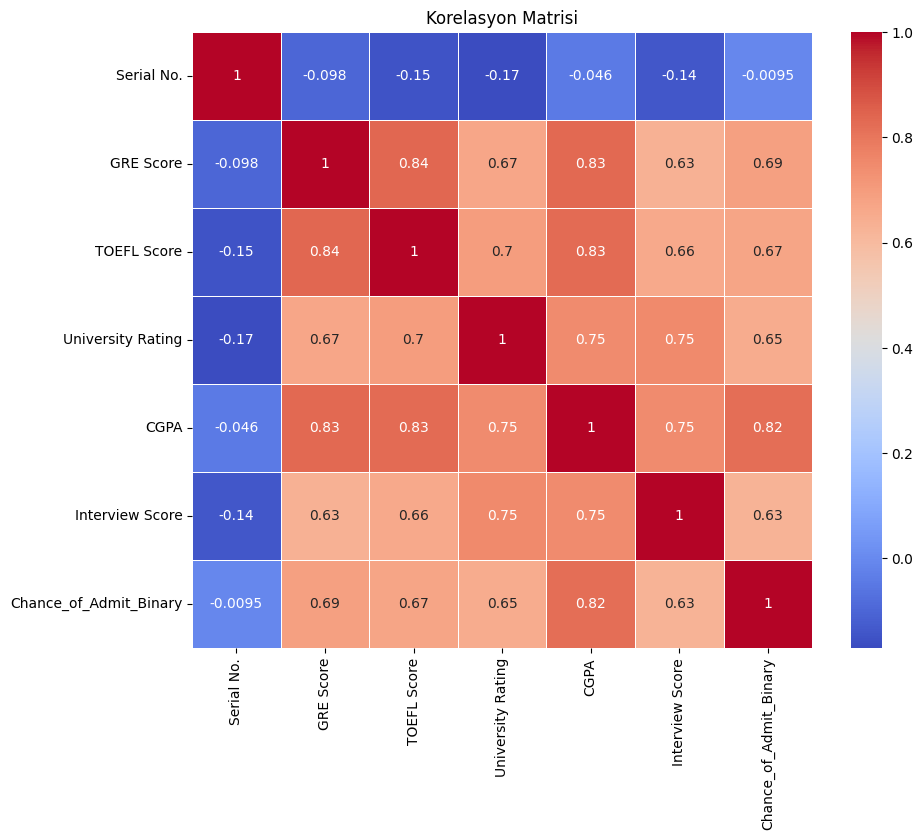

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm",linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


In [ ]:
## Convert Acceptance Probability to Binary

threshold = 0.78
if 'Chance of Admit ' in data.columns:
    data['Chance_of_Admit_Binary'] = (data['Chance of Admit '] >= threshold).astype(int)


In [ ]:
## Determining Input (X) and Target (y) Variables for the Model

drop_features_from_model = ['Serial No.', 'Serial No', 'SOP', 'LOR ', 'Chance of Admit ', 'Research', 'Chance_of_Admit_Binary']
X = data[[col for col in data.columns if col not in drop_features_from_model]]
y = data['Chance_of_Admit_Binary']
print("Modelde kullanılacak bağımsız değişkenler:", X.columns.tolist())

Modelde kullanılacak bağımsız değişkenler: ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Interview Score', 'Cluster']


In [ ]:
## Modeli Eğitim ve Test Seti Olarak Bölmek

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
## selecting only numeric ones

X = X.select_dtypes(include=[np.number])

In [ ]:
## Standartlaştırma İşlemi

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
## build a logistic regression model

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train.values.ravel())

# Test verisi ile tahmin
y_pred = model.predict(X_test_scaled)

# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy:.4f}")

Model Doğruluk Oranı: 0.9750


In [ ]:
## Model Performance Evaluation - Accuracy, Complexity Matrix and Classification Repor

y_pred = model.predict(X_test_scaled)
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Doğruluk (Accuracy): 0.975
Confusion Matrix:
 [[40  1]
 [ 1 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.97      0.97        39

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [ ]:
## K-Fold Average Accuracy

tkf = KFold(n_splits=5, shuffle=True, random_state=42)
tkf_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=tkf, scoring='accuracy')
print("K-Fold Ortalama Doğruluk:", tkf_scores.mean())

K-Fold Ortalama Doğruluk: 0.9775


In [ ]:
## Stratified K-Fold Average Accuracy

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Ortalama Doğruluk:", skf_scores.mean())

Stratified K-Fold Ortalama Doğruluk: 0.9650000000000001


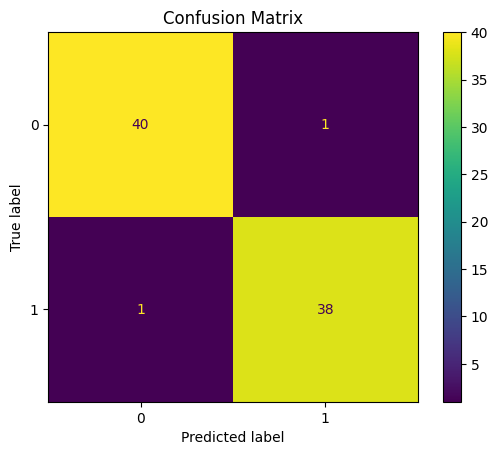

In [ ]:
## Confusion Matrix visualization

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_model.classes_).plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
## Classification with Logistic Regression - Using SGDClassifier

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-4, random_state=42, verbose=1)
sgd_model.fit(X_train_scaled, y_train.values.ravel())

print("SGD Model Ağırlıkları:")
for i, coef in enumerate(sgd_model.coef_[0]):
    print(f"  Özellik {i+1}: {coef:.4f}")

print(f"\nSGD Bias (intercept): {sgd_model.intercept_[0]:.4f}")


-- Epoch 1
Norm: 56.54, NNZs: 7, Bias: -6.021004, T: 320, Avg. loss: 1.290470
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 54.84, NNZs: 7, Bias: 3.201161, T: 640, Avg. loss: 0.375467
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 53.70, NNZs: 7, Bias: 6.542038, T: 960, Avg. loss: 0.256164
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 51.10, NNZs: 7, Bias: 7.369120, T: 1280, Avg. loss: 0.190774
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 48.42, NNZs: 7, Bias: 3.187711, T: 1600, Avg. loss: 0.075694
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 45.74, NNZs: 7, Bias: 2.206607, T: 1920, Avg. loss: 0.054429
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 42.08, NNZs: 7, Bias: -0.357495, T: 2240, Avg. loss: 0.024672
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 39.26, NNZs: 7, Bias: -0.818027, T: 2560, Avg. loss: 0.043999
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 37.00, NNZs: 7, Bias: 1.274464, T: 2880, Avg. loss: 0.022344
Total training tim

In [ ]:
## Model Probability Estimation and Results Tabulation

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Sadece 1 sınıfına ait olasılık
results_df = pd.DataFrame({
    "Gerçek Değer (Y)": y_test.values.flatten(),
    "Tahmin Edilen Olasılık": y_pred_proba.round(4),
    "Tahmin (0 = İyi Huylu, 1 = Kötü Huylu)": y_pred
})
display(results_df.head(20))


,Gerçek Değer (Y),Tahmin Edilen Olasılık,"Tahmin (0 = İyi Huylu, 1 = Kötü Huylu)"
0,0,0.0111,0
1,1,0.6215,1
2,1,1.0000,1
3,1,0.9962,1
4,0,0.0003,0
5,1,1.0000,1
6,0,0.0002,0
7,0,0.0001,0
8,0,0.0867,0
9,1,0.9992,1


In [ ]:
## Displaying Model Weights and Bias Value

print("Model ağırlıkları:", model.coef_)
print("Bias (intercept):", model.intercept_)

Model ağırlıkları: [[ 0.1509405   0.35576139  0.4012816   0.64752447  5.12912527  0.37387752
  -0.0371516 ]]
Bias (intercept): [0.20714899]


In [ ]:
## List Model Weights and Visualize GRE Score

weights_data = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0]
}).sort_values(by='Weight', ascending=False)
print("\n Model Ağırlıkları Tablosu:")
print(weights_data)

import plotly.express as px
px.scatter(data, x="GRE Score", y="Chance_of_Admit_Binary", color=data['Chance_of_Admit_Binary'].astype(str), title="GRE vs Binary Chance")


 Model Ağırlıkları Tablosu:
             Feature    Weight
4               CGPA  5.129125
3  University Rating  0.647524
2        TOEFL Score  0.401282
5    Interview Score  0.373878
1          GRE Score  0.355761
0         Serial No.  0.150941
6            Cluster -0.037152


In [ ]:
## Grouping Students in 3 Clusters with KMeans (Clustering Analysis)

from sklearn.cluster import KMeans  # KMeans algoritmasını içe aktar
kmeans = KMeans(n_clusters=3)       # 3 kümelik bir model tanımla
data['Cluster'] = kmeans.fit_predict(data[["GRE Score", "TOEFL Score", "CGPA"]])


In [ ]:
##  Relationship between CGPA and admission

px.scatter(data, x="CGPA", y="Chance_of_Admit_Binary", color=data['Chance_of_Admit_Binary'].astype(str), title="CGPA vs Binary Chance")
fig = px.scatter_3d(data, x='GRE Score', y='CGPA', z='TOEFL Score', color='Chance_of_Admit_Binary', title="3D Plot")
fig.show()

In [ ]:
## Clustering

features_for_cluster = data[['GRE Score', 'TOEFL Score', 'CGPA']]
features_scaled = StandardScaler().fit_transform(features_for_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)
px.scatter_3d(data, x='GRE Score', y='CGPA', z='TOEFL Score', color=data['Cluster'].astype(str), title="K-Means Clustering - Aday Segmentasyonu").show()